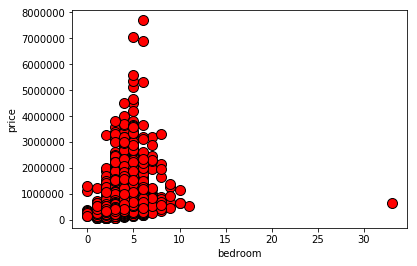

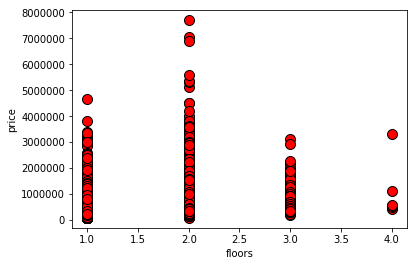

In [567]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import os

complete_data = pd.read_csv(r"C:\Users\zeina\Downloads\house_data_complete.csv")
complete_data=complete_data.drop(['date'],1)
complete_data=round(complete_data)
complete_dataAsssignemnet3 =complete_data.sample(frac=1,replace=False)
total_number = complete_data.shape[0]
training_data = complete_data [ : int(total_number*0.6)] 
price_training=training_data['price']
tetsing_data = complete_data [(training_data.shape[0]) : (int(total_number*0.6) + int(total_number*0.2))]
price_testing=testing_data['price']
cross_data = complete_data[training_data.shape[0]+testing_data.shape[0]:total_number]
price_cross=cross_data['price']

fig = plt.figure()  
plt.plot(complete_data['bedrooms'],complete_data['price'], 'ro', ms=10, mec='k')
plt.ylabel('price')
plt.xlabel('bedroom')
fig = plt.figure()  
plt.plot(complete_data['floors'],complete_data['price'], 'ro', ms=10, mec='k')
plt.ylabel('price')
plt.xlabel('floors')




def norm(data):
        data_norm = data.copy()
        mu = np.zeros(data.shape[1])
        sigma = np.zeros(data.shape[1])
        mu =data.mean()
        sigma =data.std()
        data_norm =  ( data_norm - mu ) / (sigma)
        return data_norm

In [553]:
import math
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z)) 
    return g

In [554]:
def costfunctionLogReg(theta, X, y, lambda_):
    m = training_data.shape[0] 
    J = 0    
    a = np.dot(X,theta)
    h = sigmoid(a)
    s1 = (1 / (m)) *np.sum(-y*np.log(h) - (1-y)*np.log(1-h))
    s2 = (lambda_/ (2 * m)) * np.sum(theta**2)
    J = s1 + s2
    
    return J


In [555]:
def gradLogReg(theta, X, y):
    m = training_data.shape[0]    
    a = np.dot(X,theta)
    h = sigmoid(a)
    J = costfunctionLogReg(theta, X, y, lambda_)
    grad=   (1/m) * np.dot(h - y, X) + lambda_/ m * theta
    return J,grad

In [556]:
training_data_norm = norm(training_data)
testing_data_norm = norm(testing_data)
cross_data_norm = norm(cross_data)

training_data_norm =  np.concatenate([np.ones((training_data_norm.shape[0], 1)), training_data_norm], axis=1)
cross_data_norm = np.concatenate([np.ones((cross_data_norm.shape[0], 1)), cross_data_norm], axis=1)
testing_data_norm =  np.concatenate([np.ones((testing_data_norm.shape[0], 1)), testing_data_norm], axis=1)

In [557]:
def costLinReg(X, y, lambda_, theta):
  
    m =price_training.shape[0] 
    J = 0
    hoftheta = np.dot(X,theta)
    J = (sum((hoftheta-y)**2) / (2*m))+((sum((theta)**2))*(lambda_/(2*m)))
    
    return J

In [558]:
def gradientDescentLinReg(X, y, theta, alpha, lambda_, num_iters):
    m = price_training.shape[0]
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        hOfTheta = np.dot(X,theta)
        theta = theta-((alpha/m)*((np.dot(X.T,hOfTheta-y))+(lambda_*theta)))   
        J_history.append(costLinReg(X, y, lambda_, theta))
    
    return theta, J_history


In [559]:
def computeCost(X, y, theta):
  
    m = price_training.shape[0]
    J=0
    hoftheta = np.dot(X,theta)
    J = (sum((hoftheta-y)**2) / (2*m))
    
    return J

In [560]:
lambda_array = np.arange(0.0001,0.1,0.01)
theta_array1=np.zeros((training_data_norm.shape[1]))
theta_array2=np.zeros((training_data_norm.shape[1]))
theta_array3=np.zeros((training_data_norm.shape[1]))

for lambda_ in lambda_array:
    theta=np.zeros(training_data_norm.shape[1])
    iterartions= 200
    theta_one, J_history_one=gradientDescentLinReg(training_data_norm, price_training, theta, 0.1,lambda_, iterations)
    theta_array1=np.concatenate([theta_array1,theta_one], axis=0, out=None)
    
    theta_two, J_history_two=gradientDescentLinReg((training_data_norm)**2, price_training, theta, 0.0001, lambda_,iterations)
    theta_array2=np.concatenate([theta_array2,theta_two], axis=0, out=None)
    
    theta_three, J_history_three=gradientDescentLinReg((training_data_norm)**3, price_training, theta, 0.000001, lambda_, iterations)
    theta_array3=np.concatenate([theta_array1,theta_three], axis=0, out=None)

In [561]:
J_history_one= []
J_history_two = []
J_history_three = []

for i in range(lambda_array.size):
    theta_one=theta_array1[i*21:((i+1)*21)]
    theta_two=theta_array2[i*21:((i+1)*21)]
    theta_three=theta_array3[i*21:((i+1)*21)]
    J_history_one.append(computeCost(cross_data_norm, price_cross, theta_one))
    J_history_two.append(computeCost(cross_data_norm**2, price_cross, theta_two))
    J_history_three.append(computeCost(cross_data_norm**3, price_cross, theta_three))


#index_one=J_history_one.index(min(J_history_one))
theta_one_min=theta_array1[J_history_one.index(min(J_history_one))*21:((J_history_one.index(min(J_history_one))+1)*21)]
lambda_one_min=lambda_array[J_history_one.index(min(J_history_one))]

theta_two_min=theta_array2[J_history_two.index(min(J_history_two))*21:((J_history_two.index(min(J_history_two))+1)*21)]
lambda_two_min=lambda_array[J_history_two.index(min(J_history_two))]


theta_three_min=theta_array3[J_history_three.index(min(J_history_three))*21:((J_history_three.index(min(J_history_three))+1)*21)]
lambda_three_min=lambda_array[J_history_three.index(min(J_history_three))]


In [562]:
theta=np.zeros(training_data_norm.shape[1])
lambda_=0.01
iterations=200
theta_one, J_history_one=gradientDescentLinReg(training_data_norm, price_training, theta, 0.1,lambda_, iterations)
    
theta_two, J_history_two=gradientDescentLinReg((training_data_norm)**2, price_training, theta, 0.0001, lambda_,iterations)

theta_three, J_history_three=gradientDescentLinReg((training_data_norm)**3, price_training, theta, 0.000001, lambda_, iterations)


Text(0, 0.5, 'Cost of fisrt hypnoses')

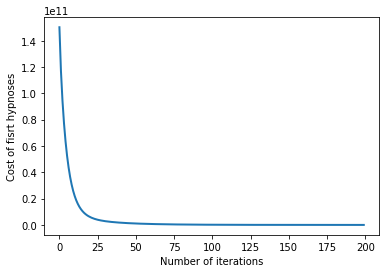

In [563]:
plt.plot(np.arange(iterations), J_history_one, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost of fisrt hypnoses')

Text(0, 0.5, 'Cost of second hypnoses')

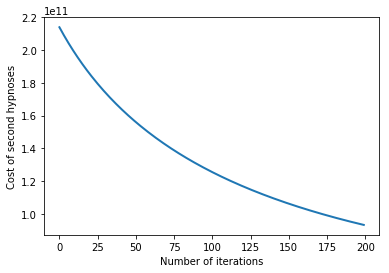

In [564]:
plt.plot(np.arange(iterations), J_history_two, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost of second hypnoses')

Text(0, 0.5, 'Cost of third hypnoses')

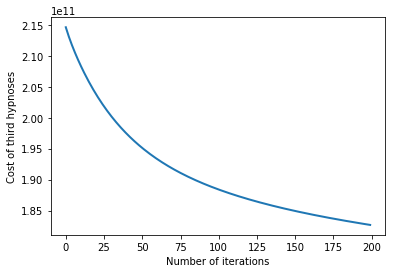

In [565]:
plt.plot(np.arange(iterations), J_history_three, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost of third hypnoses')

In [566]:
cost_one_test = costLinReg(testing_data_norm, price_testing, lambda_one_min, theta_one_min)
cost_two_test = costLinReg(testing_data_norm, price_testing, lambda_two_min, theta_two_min)
cost_three_test = costLinReg(testing_data_norm, price_testing, lambda_three_min, theta_three_min)
print('cost_one_test',cost_one_test)
print('cost_two_test',cost_two_test)
print('cost_three_test',cost_three_test)


cost_one_cross = costLinReg(cross_data_norm, price_cross, lambda_one_min, theta_one_min)
cost_two_cross = costLinReg(cross_data_norm, price_cross, lambda_two_min, theta_two_min)
cost_three_cross= costLinReg(cross_data_norm, price_cross, lambda_three_min, theta_three_min)
print('cost_one_cross',cost_one_cross)
print('cost_two_cross',cost_two_cross)
print('cost_three_cross',cost_three_cross)


cost_one_test 38858242.70528785
cost_two_test 59996304722.60535
cost_three_test 69355572534.81163
cost_one_cross 3674749.773456389
cost_two_cross 61543287225.20739
cost_three_cross 71199348133.90611
